# IMU LSTM Model Visualization

This notebook visualizes the training process, evaluates the model on the test set, and plots the predicted vs. actual x and y coordinates.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from lstm_model import IMULSTMModel
import os
from tqdm import tqdm
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from lstm_test import IMUSequence, load_data, evaluate_model, test_model

## Set up model parameters

In [2]:
input_size = 12
hidden_sizes = [64]
output_size = 3
sequence_length = 200

## Evaluate the trained model

In [3]:
# Initialize the model
model = IMULSTMModel(input_size, hidden_sizes, output_size)

# Load the trained model
model.load_state_dict(torch.load('../../model/best_imu_lstm_model.pth'))
model.eval()

# Usage
test_root_dir = '../../data/Oxford Inertial Odometry Dataset/handheld_test'


test_loss, predictions, targets, overall_metrics = test_model(model, test_root_dir, sequence_length, output_size)

for metric, value in overall_metrics.items():
    print(f"Test/{metric}", value, 0)


# Sequence: data5/imu1.csv
# ATE_mean: 1.1046
# ATE_max: 3.8172
# RTE_mean: 1.3101
# RTE_max: 1.4545
# MSE: 0.5724
# MAE: 0.4717
# RMSE: 0.7566

/tmp/ipykernel_9164/3460277457.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('../../model/best_imu_lstm_model.pth'))



Starting model evaluation...
Testing Dataset Information:
Number of sequences: 4
Model Sequence length: 200


Evaluating:   0%|          | 0/4 [00:00<?, ?it/s]

Start evaluating


Evaluating:  25%|██▌       | 1/4 [00:16<00:48, 16.30s/it]


Sequence: data5/imu1.csv
ATE_mean: 0.9230
ATE_max: 3.8611
RTE_mean: 1.1169
RTE_max: 1.2461
MSE: 0.4229
MAE: 0.3934
RMSE: 0.6503
Start evaluating


Evaluating:  50%|█████     | 2/4 [00:47<00:50, 25.27s/it]


Sequence: data5/imu2.csv
ATE_mean: 0.7526
ATE_max: 4.1438
RTE_mean: 0.9177
RTE_max: 1.1432
MSE: 0.2912
MAE: 0.3198
RMSE: 0.5397
Start evaluating


Evaluating:  75%|███████▌  | 3/4 [01:17<00:27, 27.23s/it]


Sequence: data5/imu3.csv
ATE_mean: 0.7672
ATE_max: 3.7914
RTE_mean: 0.9499
RTE_max: 1.0541
MSE: 0.3019
MAE: 0.3236
RMSE: 0.5495
Start evaluating


Evaluating: 100%|██████████| 4/4 [01:35<00:00, 23.80s/it]


Sequence: data5/imu4.csv
ATE_mean: 0.7497
ATE_max: 4.1465
RTE_mean: 0.9558
RTE_max: 1.1125
MSE: 0.3083
MAE: 0.3165
RMSE: 0.5552

Overall Test Loss: 0.3202
Predictions shape: (183042, 3)
Targets shape: (183042, 3)

Overall Metrics:
ATE_mean: 0.7854
ATE_max: 4.1465
RTE_mean: 0.9654
RTE_max: 1.2461
MSE: 0.3202
MAE: 0.3328
RMSE: 0.5659
Test/ATE_mean 0.7853753034821472 0
Test/ATE_max 4.146535912519597 0
Test/RTE_mean 0.9653541916713733 0
Test/RTE_max 1.2461026747091084 0
Test/MSE 0.320234599712389 0
Test/MAE 0.33280270664164674 0
Test/RMSE 0.565892745767596 0


## Visualize predictions vs. actual coordinates

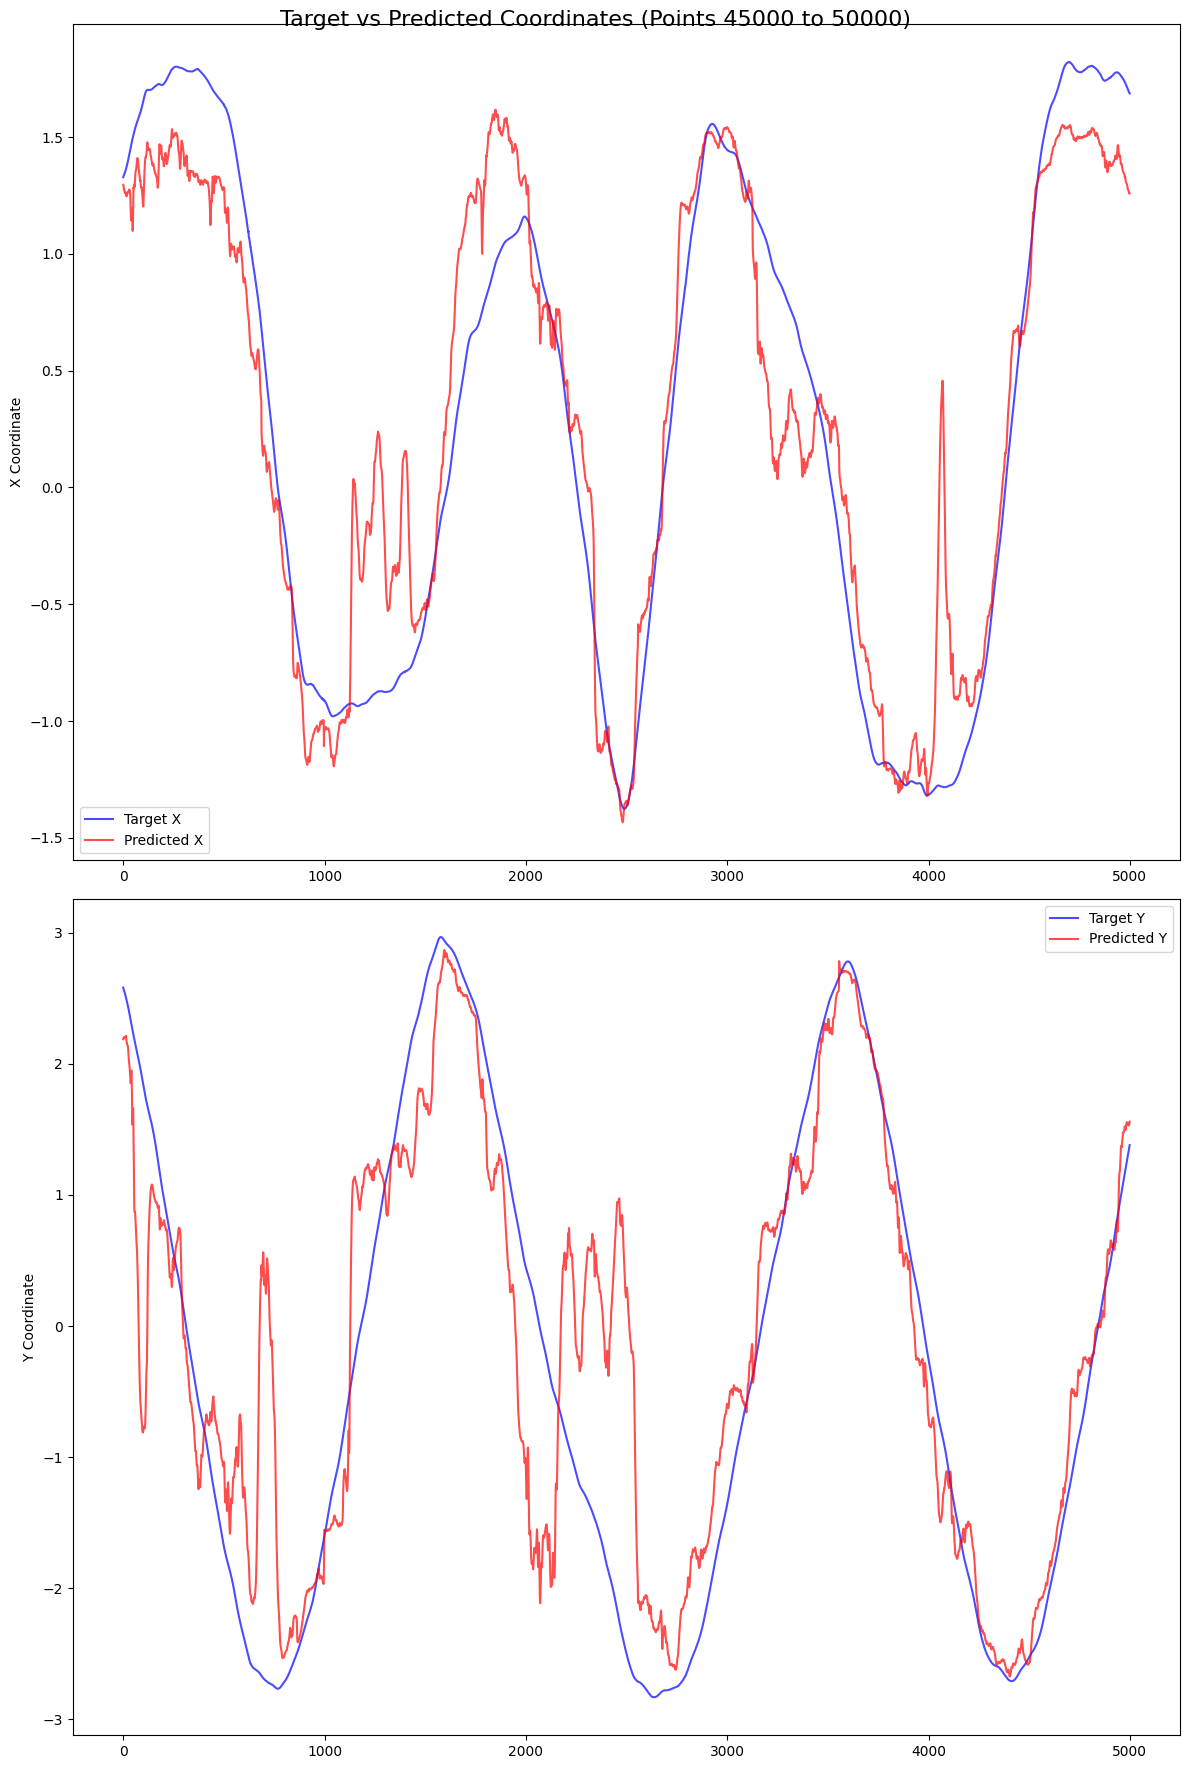

Number of points: 5000
X coordinate - Mean absolute error: 0.2876
Y coordinate - Mean absolute error: 0.5920


In [10]:
import matplotlib.pyplot as plt

# Define the range for the first sequence
start_point = 45000
end_point = 50000

################################################

# Extract the relevant portion of the data
range_predictions = predictions[start_point:end_point]
range_targets = targets[start_point:end_point]

# Create a 3x1 subplot for X, Y, and Z coordinates
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 18))
fig.suptitle(f'Target vs Predicted Coordinates (Points {start_point} to {end_point})', fontsize=16)

# Plot X coordinates
ax1.plot(range(len(range_targets)), range_targets[:, 0], 'b-', label='Target X', alpha=0.7)
ax1.plot(range(len(range_predictions)), range_predictions[:, 0], 'r-', label='Predicted X', alpha=0.7)
ax1.set_ylabel('X Coordinate')
ax1.legend()

# Plot Y coordinates
ax2.plot(range(len(range_targets)), range_targets[:, 1], 'b-', label='Target Y', alpha=0.7)
ax2.plot(range(len(range_predictions)), range_predictions[:, 1], 'r-', label='Predicted Y', alpha=0.7)
ax2.set_ylabel('Y Coordinate')
ax2.legend()

plt.tight_layout()
plt.show()

# Print some statistics
print(f"Number of points: {len(range_targets)}")
print(f"X coordinate - Mean absolute error: {np.mean(np.abs(range_predictions[:, 0] - range_targets[:, 0])):.4f}")
print(f"Y coordinate - Mean absolute error: {np.mean(np.abs(range_predictions[:, 1] - range_targets[:, 1])):.4f}")

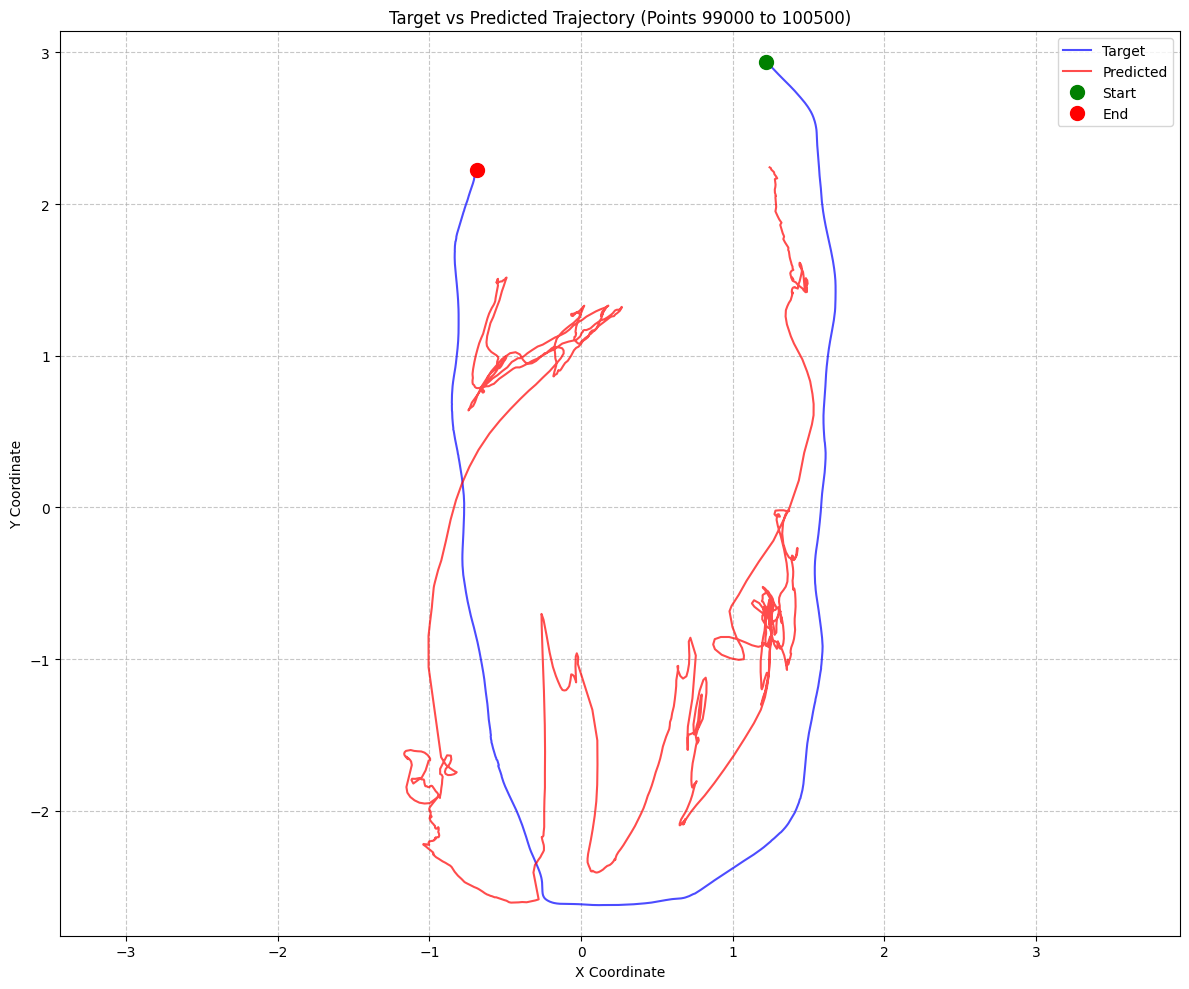

Number of points: 1500
X coordinate - Mean absolute error: 0.4113
Y coordinate - Mean absolute error: 0.7820


In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range for the sequence
start_point = 99000
end_point = 100500


############################################

# Extract the relevant portion of the data
range_predictions = predictions[start_point:end_point]
range_targets = targets[start_point:end_point]

# Create a figure
plt.figure(figsize=(12, 10))

# Plot the trajectories
plt.plot(range_targets[:, 0], range_targets[:, 1], 'b-', label='Target', alpha=0.7)
plt.plot(range_predictions[:, 0], range_predictions[:, 1], 'r-', label='Predicted', alpha=0.7)

# Mark start and end points
plt.plot(range_targets[0, 0], range_targets[0, 1], 'go', markersize=10, label='Start')
plt.plot(range_targets[-1, 0], range_targets[-1, 1], 'ro', markersize=10, label='End')

# Set labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title(f'Target vs Predicted Trajectory (Points {start_point} to {end_point})')

# Add legend
plt.legend()

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Ensure equal aspect ratio
plt.axis('equal')

# Show the plot
plt.tight_layout()
plt.show()

# Print some statistics
print(f"Number of points: {len(range_targets)}")
print(f"X coordinate - Mean absolute error: {np.mean(np.abs(range_predictions[:, 0] - range_targets[:, 0])):.4f}")
print(f"Y coordinate - Mean absolute error: {np.mean(np.abs(range_predictions[:, 1] - range_targets[:, 1])):.4f}")